In [0]:
from fastai.vision import *

In [26]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
path="/content/gdrive/My Drive/data/colab"
condt=False #make true to verify integrety of files
if condt:
  for folder in ('forky', 'spoony','knifey'):
      print(folder)
      verify_images(path+folder, delete=True, max_size=700)

In [0]:
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [5]:
data.classes

['forky', 'knifey', 'spoony']

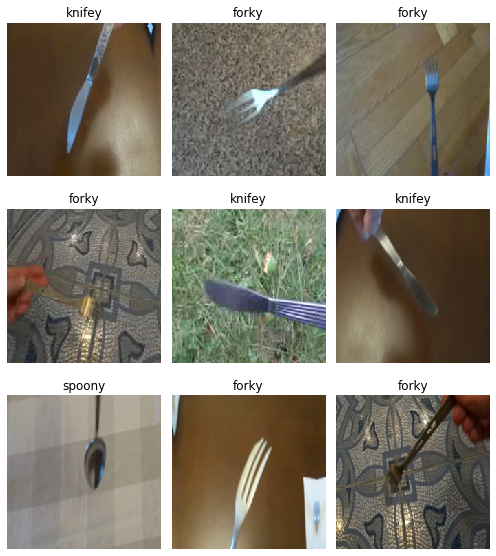

In [6]:
data.show_batch(rows=3, figsize=(7, 8)) #showing some of the images

In [7]:
from fastai.metrics import error_rate
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [8]:
defaults.device = torch.device('cuda')
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.854715,0.237039,0.076510,00:27
1,0.506145,0.141545,0.049664,00:26
2,0.321731,0.136907,0.049664,00:26
3,0.233689,0.126245,0.044295,00:26


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


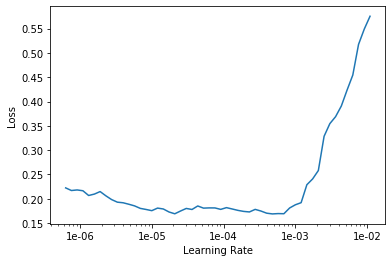

In [9]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(4, max_lr=slice(3e-5, 6e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.136097,0.087061,0.025503,00:28
1,0.107317,0.054076,0.017450,00:28
2,0.074661,0.023706,0.008054,00:28
3,0.044520,0.024138,0.005369,00:28


In [0]:
learn.save('cutlery-stage-1')

In [22]:
clean='/cleaned.csv'
df = pd.read_csv(path+clean, header='infer')
print(df.head())
db = (ImageList.from_df(df, path)
                   .split_by_rand_pct(0.2)
                   .label_from_df()
                   .transform(get_transforms(), size=224)
                   .databunch(bs=9)).normalize(imagenet_stats)

                        name   label
0  knifey/knifey-01-0225.jpg  knifey
1  knifey/knifey-01-0226.jpg  knifey
2  knifey/knifey-01-0229.jpg  knifey
3  knifey/knifey-01-0230.jpg  knifey
4  knifey/knifey-01-0232.jpg  knifey


['forky', 'knifey', 'spoony'] 3 2984 745
['forky', 'knifey', 'spoony'] 3 2388 596


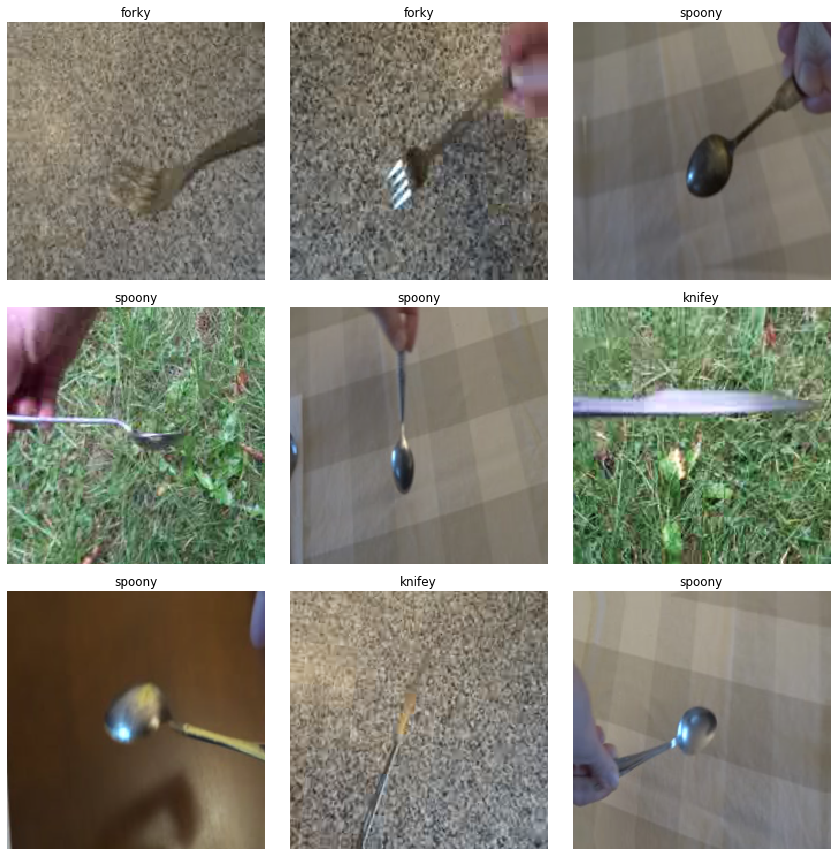

In [23]:
print(data.classes, data.c, len(data.train_ds), len(data.valid_ds))
print(db.classes, db.c, len(db.train_ds), len(db.valid_ds))

Old:['forky', 'knifey', 'spoony'] 
New:['forky', 'knifey', 'spoony'] 
db.show_batch()

epoch,train_loss,valid_loss,error_rate,time
0,0.234769,0.024014,0.011745,00:25
1,0.186289,0.013327,0.006711,00:25
2,0.145861,0.017259,0.005034,00:25
3,0.092613,0.015517,0.005034,00:25


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,time
0,0.399717,0.121244,0.041946,00:27
1,0.241807,0.066054,0.016779,00:26
2,0.131722,0.036463,0.011745,00:26
3,0.084706,0.028100,0.008389,00:27


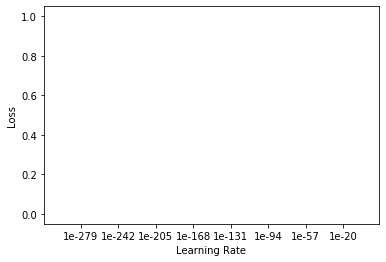

In [29]:
learn.load('cutlery-stage-1')
learn.data = db 

learn.freeze()
learn.fit_one_cycle(4)

learn.unfreeze()

learn.lr_find()
learn.recorder.plot()

learn.fit_one_cycle(4, max_lr=slice(3e-5, 6e-4))
learn.save('cutlery-stage-2')